In [510]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [511]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [512]:
df.shape


(891, 12)

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [514]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [515]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [516]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [517]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [518]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

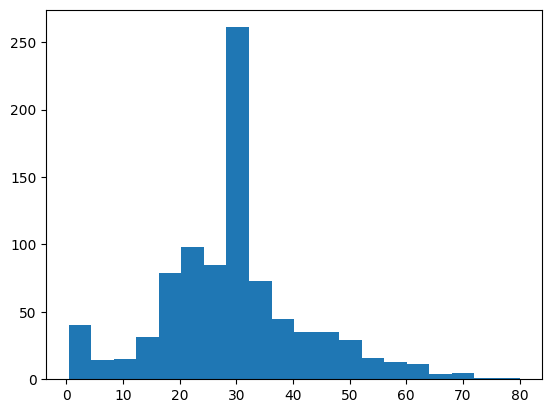

In [519]:
plt.hist(df['Age'],bins=20)


<Axes: xlabel='Sex', ylabel='count'>

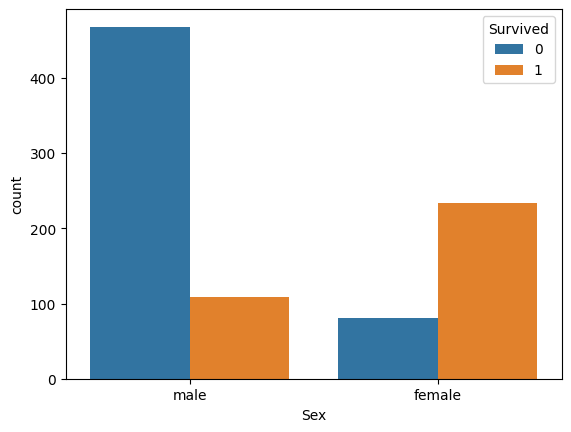

In [520]:
sns.countplot(x=df['Sex'],hue=df['Survived'],data = df)

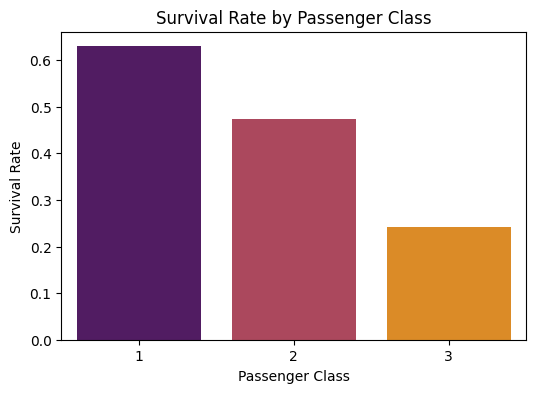

In [521]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived',palette="inferno", data=df,ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

In [522]:
x= df[['Pclass','Age','Sex']]
y=df['Survived']

In [523]:
from sklearn.model_selection import train_test_split

In [533]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.25)


In [534]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_train['Sex'] = label_encoder.fit_transform(x_train['Sex'])
x_test['Sex'] = label_encoder.transform(x_test['Sex'])
x_train = pd.get_dummies(x_train, columns=['Sex'])
x_test = pd.get_dummies(x_test, columns=['Sex'])


In [535]:
x_train.shape

(668, 4)

In [536]:
y_train.shape

(668,)

In [537]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [538]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.7937219730941704

In [539]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,NaN
1,1,1,0,38.000000,1,0,71.2833,NaN
2,1,3,0,26.000000,0,0,7.9250,NaN
3,1,1,0,35.000000,1,0,53.1000,NaN
4,0,3,1,35.000000,0,0,8.0500,NaN
5,0,3,1,29.699118,0,0,8.4583,NaN
6,0,1,1,54.000000,0,0,51.8625,NaN
7,0,3,1,2.000000,3,1,21.0750,NaN
8,1,3,0,27.000000,0,2,11.1333,NaN
9,1,2,0,14.000000,1,0,30.0708,NaN


In [540]:
pclass = int(input("Enter Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): "))
sex = int(input("Enter Gender (0 = Female, 1 = Male): "))
siblings_spouses = int(input("Enter Number of Siblings/Spouses Aboard: "))
parents_children = int(input("Enter Number of Parents/Children Aboard: "))

# Predict the outcome using the user-provided data
res = model.predict([[pclass, sex, siblings_spouses, parents_children]])[0]

# Interpret and print the prediction result
if res == 0:
    print("Not Survived")
else:
    print("Survived")

Enter Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): 2
Enter Gender (0 = Female, 1 = Male): 0
Enter Number of Siblings/Spouses Aboard: 1
Enter Number of Parents/Children Aboard: 0
Survived
